In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow import keras

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/'
import graphviz

In [2]:
label_map = {"Contradictory": 0, "Implies": 1, "NoEntailment": 2}

In [3]:
image_base_path = keras.utils.get_file("tweet_images",
    "https://github.com/sayakpaul/Multimodal-Entailment-Baseline/releases/download/v1.0.0/tweet_images.tar.gz",
    untar=True
)

In [4]:
df = pd.read_csv("https://github.com/sayakpaul/Multimodal-Entailment-Baseline/raw/main/csvs/tweets.csv")
df.head()

,id_1,text_1,image_1,id_2,text_2,image_2,label
0,1375936088968200205,"150 years after its inauguration, the strategi...",http://pbs.twimg.com/media/ExeIVRBWYAAwizQ.jpg,1376653595144241155,Look how only 190 km #suezcanel carries 12% of...,http://pbs.twimg.com/media/ExrbJffWgAoBaxO.jpg,NoEntailment
1,1360981123388436489,Fall Guys is celebrating Valentine's Day with ...,http://pbs.twimg.com/media/EuMowPiXYAEylR8.jpg,1361075903606910976,Fall Guys Red Panda costume available for limi...,http://pbs.twimg.com/media/EuODUixWYAMRukK.jpg,NoEntailment
2,1336637206899945472,Impressive Batting Display From Shoaib Malik 🏏...,http://pbs.twimg.com/media/EoywcVGXMAE5FZK.jpg,1339243901799030785,"A Half century of King\n\n 🔥""Shoaib Malik"" ...",http://pbs.twimg.com/media/EpXzOwRXYAYLaCB.jpg,NoEntailment
3,1336490796279742464,How #confident are you today? https://t.co/5ay...,http://pbs.twimg.com/media/EowrS9aVEAAMhsF.jpg,1341081069248868353,How #confident are you today? https://t.co/KqZ...,http://pbs.twimg.com/media/Epx6IA-UwAA8pqN.jpg,Implies
4,1358934899256877059,The Peacocks finish out the first quarter trai...,http://pbs.twimg.com/media/EtvoCsuWQAALmyP.jpg,1361131487077228546,10 minutes gone here at home as the Peacocks l...,http://pbs.twimg.com/media/EuO1xf2XIAAOIGb.jpg,NoEntailment


In [5]:
df["label"].value_counts()

NoEntailment     1182
Contradictory     109
Implies           109
Name: label, dtype: int64

In [6]:
images_one_paths = []
images_two_paths = []

for idx in range(len(df)):
    current_row = df.iloc[idx]
    id_1 = current_row["id_1"]
    id_2 = current_row["id_2"]
    extentsion_one = current_row["image_1"].split(".")[-1]
    extentsion_two = current_row["image_2"].split(".")[-1]

    image_one_path = os.path.join(image_base_path, str(id_1) + f".{extentsion_one}")
    image_two_path = os.path.join(image_base_path, str(id_2) + f".{extentsion_two}")

    images_one_paths.append(image_one_path)
    images_two_paths.append(image_two_path)

df["image_1_path"] = images_one_paths
df["image_2_path"] = images_two_paths

# Create another column containing the integer ids of
# the string labels.
df["label_idx"] = df["label"].apply(lambda x: label_map[x])

In [7]:
def visualize(idx):
    current_row = df.iloc[idx]
    image_1 = plt.imread(current_row["image_1_path"])
    image_2 = plt.imread(current_row["image_2_path"])
    text_1 = current_row["text_1"]
    text_2 = current_row["text_2"]
    label = current_row["label"]

    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.axis("off")
    plt.title("Image One")
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.axis("off")
    plt.title("Image Two")
    plt.show()

    print(f"Text one: {text_1}")
    print(f"Text two: {text_2}")
    print(f"Label: {label}")

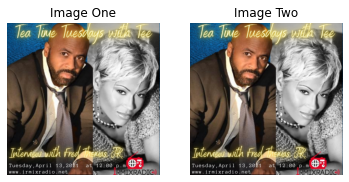

Text one: Don't forget to grab your cup of #tea and listen to Tea Time Tuesdays with Tee at 12:00 p.m. EST. Today, Tee Spence is interviewing film and stage director Fred Thomas Jr, on #IRMIXRadio listen here https://t.co/PouOWVPaXT or https://t.co/x76ApRIHPS #Movies #Radio #Interview https://t.co/kf7dNYdFCB
Text two: catch the #Repeat #broadcast at 12:00 a.m. EST Tee Spence, Grab your #camomille #tea...  Tea Time Tuesdays with Tee #interview with film director Fred Thomas Jr. only on #IRMIXRadio https://t.co/PouOWVPaXT or  https://t.co/x76ApRIHPS https://t.co/VKSTYtIl3a
Label: Implies


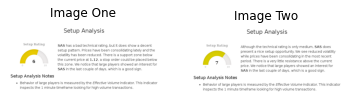

Text one: Although the technical rating is bad, $SAS.CO does present a nice setup opportunity. https://t.co/FZ4AyZZCOT #ChartMill #SASAB #SAS #NasdaqCopenhagenA/S #TechnicalAnalysis https://t.co/5piSPixU4G
Text two: $SAS.CO has only a medium technical rating, but it does show a decent setup pattern. https://t.co/FZ4AyZZCOT #ChartMill #SASAB #SAS #NasdaqCopenhagenA/S #TechnicalAnalysis https://t.co/3mNEgbwvgq
Label: Contradictory


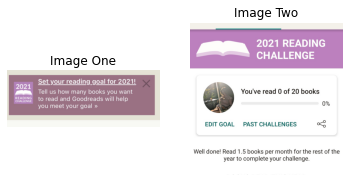

Text one: First task of the year: setting my reading goals for 2021! #amreading #readingchallenge2021 https://t.co/nw3RkHCkIO
Text two: Reading challenge for 2021 #goodreads #readingchallenge2021 #goodreadsreadingchallenge #goodreadsreadingchallenge2021 https://t.co/1xtQr8L45m
Label: NoEntailment


In [8]:
random_idx = np.random.choice(len(df))
visualize(8)
random_idx = np.random.choice(len(df))
visualize(18)
random_idx = np.random.choice(len(df))
visualize(random_idx)

In [9]:
bert_model_path = ("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1")
bert_preprocess_path = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

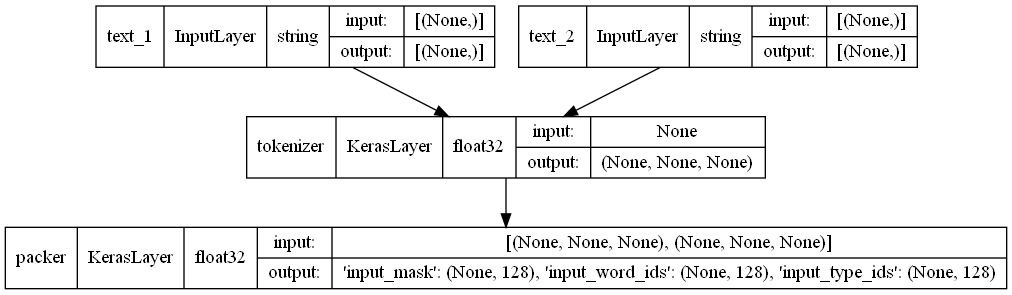

In [10]:
def make_bert_preprocessing_model(sentence_features, seq_length=128):

    input_segments = [
        tf.keras.layers.Input(shape=(), dtype=tf.string, name=ft)
        for ft in sentence_features
    ]

    # Tokenize the text to word pieces.
    bert_preprocess = hub.load(bert_preprocess_path)
    tokenizer = hub.KerasLayer(bert_preprocess.tokenize, name="tokenizer")
    segments = [tokenizer(s) for s in input_segments]

    # Optional: Trim segments in a smart way to fit seq_length.
    # Simple cases (like this example) can skip this step and let
    # the next step apply a default truncation to approximately equal lengths.
    truncated_segments = segments

    # Pack inputs. The details (start/end token ids, dict of output tensors)
    # are model-dependent, so this gets loaded from the SavedModel.
    packer = hub.KerasLayer(
        bert_preprocess.bert_pack_inputs,
        arguments=dict(seq_length=seq_length),
        name="packer",
    )
    model_inputs = packer(truncated_segments)
    return keras.Model(input_segments, model_inputs)

bert_preprocess_model = make_bert_preprocessing_model(["text_1", "text_2"])
keras.utils.plot_model(bert_preprocess_model, show_shapes=True, show_dtype=True)

In [11]:
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df["label"].values, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.05, stratify=train_df["label"].values, random_state=42)

print(f"Total training examples: {len(train_df)}")
print(f"Total validation examples: {len(val_df)}")
print(f"Total test examples: {len(test_df)}")

Total training examples: 1197
Total validation examples: 63
Total test examples: 140


In [12]:
idx = np.random.choice(len(train_df))
row = train_df.iloc[idx]
sample_text_1, sample_text_2 = row["text_1"], row["text_2"]
print(f"Text 1: {sample_text_1}")
print(f"Text 2: {sample_text_2}")

test_text = [np.array([sample_text_1]), np.array([sample_text_2])]
text_preprocessed = bert_preprocess_model(test_text)

print("Keys           : ", list(text_preprocessed.keys()))
print("Shape Word Ids : ", text_preprocessed["input_word_ids"].shape)
print("Word Ids       : ", text_preprocessed["input_word_ids"][0, :16])
print("Shape Mask     : ", text_preprocessed["input_mask"].shape)
print("Input Mask     : ", text_preprocessed["input_mask"][0, :16])
print("Shape Type Ids : ", text_preprocessed["input_type_ids"].shape)
print("Type Ids       : ", text_preprocessed["input_type_ids"][0, :16])

Text 1: My followers are in South Africa(43%), USA(25%)... Get your map too: https://t.co/f1oYViLXEj https://t.co/35HZehNaVa
Text 2: My followers live in USA (16%), Nigeria(7%)... Get your map: https://t.co/5fq9WvpaZX https://t.co/5v1q8f9j9o
Keys           :  ['input_mask', 'input_word_ids', 'input_type_ids']
Shape Word Ids :  (1, 128)
Word Ids       :  tf.Tensor(
[ 101 2026 8771 2024 1999 2148 3088 1006 4724 1003 1007 1010 3915 1006
 2423 1003], shape=(16,), dtype=int32)
Shape Mask     :  (1, 128)
Input Mask     :  tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
Shape Type Ids :  (1, 128)
Type Ids       :  tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)


In [13]:
resize = (128, 128)
bert_input_features = ["input_word_ids", "input_type_ids", "input_mask"]

def preprocess_text(text_1, text_2):
    text_1 = tf.convert_to_tensor([text_1])
    text_2 = tf.convert_to_tensor([text_2])
    output = bert_preprocess_model([text_1, text_2])
    output = {feature: tf.squeeze(output[feature]) for feature in bert_input_features}
    return output

def preprocess_image(image_path):
    extension = tf.strings.split(image_path)[-1]

    image = tf.io.read_file(image_path)
    if extension == b"jpg":
        image = tf.image.decode_jpeg(image, 3)
    else:
        image = tf.image.decode_png(image, 3)
    image = tf.image.resize(image, resize)
    return image

def preprocess_text_and_image(sample):
    image_1 = preprocess_image(sample["image_1_path"])
    image_2 = preprocess_image(sample["image_2_path"])
    text = preprocess_text(sample["text_1"], sample["text_2"])
    return {"image_1": image_1, "image_2": image_2, "text": text}

In [14]:
batch_size = 32
auto = tf.data.AUTOTUNE

def dataframe_to_dataset(dataframe):
    columns = ["image_1_path", "image_2_path", "text_1", "text_2", "label_idx"]
    dataframe = dataframe[columns].copy()
    labels = dataframe.pop("label_idx")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

def prepare_dataset(dataframe, training=True):
    ds = dataframe_to_dataset(dataframe)
    if training:
        ds = ds.shuffle(len(train_df))
    ds = ds.map(lambda x, y: (preprocess_text_and_image(x), y)).cache()
    ds = ds.batch(batch_size).prefetch(auto)
    return ds

train_ds = prepare_dataset(train_df)
validation_ds = prepare_dataset(val_df, False)
test_ds = prepare_dataset(test_df, False)

In [15]:
def project_embeddings(embeddings, num_projection_layers, projection_dims, dropout_rate):
    projected_embeddings = keras.layers.Dense(units=projection_dims)(embeddings)
    for _ in range(num_projection_layers):
        x = tf.nn.gelu(projected_embeddings)
        x = keras.layers.Dense(projection_dims)(x)
        x = keras.layers.Dropout(dropout_rate)(x)
        x = keras.layers.Add()([projected_embeddings, x])
        projected_embeddings = keras.layers.LayerNormalization()(x)
    return projected_embeddings

In [16]:
def create_text_encoder(num_projection_layers, projection_dims, dropout_rate, trainable=False):
    bert = hub.KerasLayer(bert_model_path, name="bert")
    bert.trainable = trainable
    bert_input_features = ["input_type_ids", "input_mask", "input_word_ids"]
    inputs = {
        feature: keras.Input(shape=(128,), dtype=tf.int32, name=feature)
        for feature in bert_input_features
    }
    embeddings = bert(inputs)["pooled_output"]
    outputs = project_embeddings(embeddings, num_projection_layers, projection_dims, dropout_rate)
    return keras.Model(inputs, outputs, name="text_encoder")

In [17]:
def create_image_encoder(
    num_projection_layers, projection_dims, dropout_rate, trainable=False):
    resnet_v2 = keras.applications.ResNet50V2(
        include_top=False, weights="imagenet", pooling="avg"
    )
    for layer in resnet_v2.layers:
        layer.trainable = trainable

    image_1 = keras.Input(shape=(128, 128, 3), name="image_1")
    image_2 = keras.Input(shape=(128, 128, 3), name="image_2")

    preprocessed_1 = keras.applications.resnet_v2.preprocess_input(image_1)
    preprocessed_2 = keras.applications.resnet_v2.preprocess_input(image_2)

    embeddings_1 = resnet_v2(preprocessed_1)
    embeddings_2 = resnet_v2(preprocessed_2)
    embeddings = keras.layers.Concatenate()([embeddings_1, embeddings_2])
    
    outputs = project_embeddings(
        embeddings, num_projection_layers, projection_dims, dropout_rate
    )
    return keras.Model([image_1, image_2], outputs, name="image_encoder")

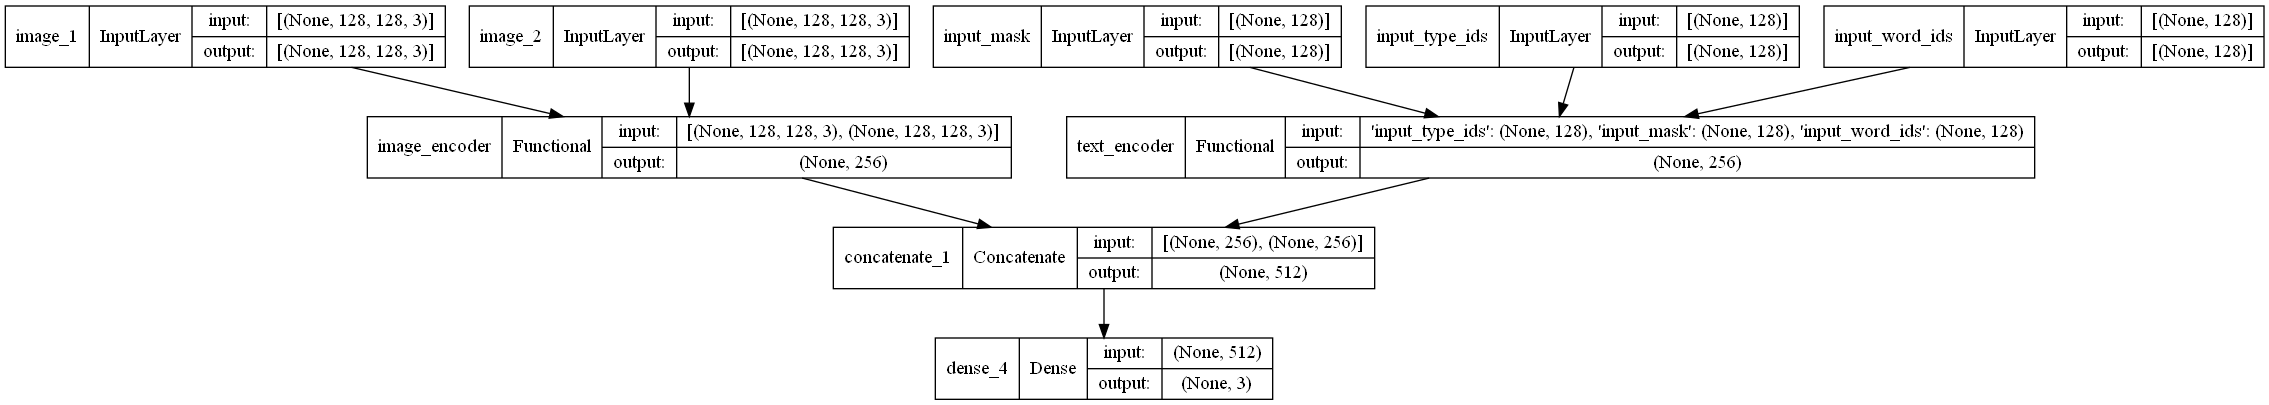

In [18]:
def create_multimodal_model(num_projection_layers=1, projection_dims=256, dropout_rate=0.1, image_trainable=False, 
                            text_trainable=False):
    image_1 = keras.Input(shape=(128, 128, 3), name="image_1")
    image_2 = keras.Input(shape=(128, 128, 3), name="image_2")

    bert_input_features = ["input_type_ids", "input_mask", "input_word_ids"]
    text_inputs = {
        feature: keras.Input(shape=(128,), dtype=tf.int32, name=feature)
        for feature in bert_input_features
    }

    text_encoder = create_text_encoder(
        num_projection_layers, projection_dims, dropout_rate, text_trainable
    )
    image_encoder = create_image_encoder(
        num_projection_layers, projection_dims, dropout_rate, image_trainable
    )

    text_projections = text_encoder(text_inputs)
    image_projections = image_encoder([image_1, image_2])

    concatenated = keras.layers.Concatenate()([image_projections, text_projections])
    outputs = keras.layers.Dense(3, activation="softmax")(concatenated)
    return keras.Model([image_1, image_2, text_inputs], outputs)

multimodal_model = create_multimodal_model()
keras.utils.plot_model(multimodal_model, show_shapes=True)

In [19]:
multimodal_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = multimodal_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
38/38 [==============================] - 66s 2s/step - loss: 1.0188 - accuracy: 0.8037 - val_loss: 0.6302 - val_accuracy: 0.8571
Epoch 2/10
38/38 [==============================] - 56s 1s/step - loss: 0.4217 - accuracy: 0.8797 - val_loss: 0.5556 - val_accuracy: 0.8571
Epoch 3/10
38/38 [==============================] - 58s 2s/step - loss: 0.3560 - accuracy: 0.8881 - val_loss: 0.5691 - val_accuracy: 0.8571
Epoch 4/10
38/38 [==============================] - 60s 2s/step - loss: 0.2928 - accuracy: 0.9064 - val_loss: 0.6188 - val_accuracy: 0.8571
Epoch 5/10
38/38 [==============================] - 60s 2s/step - loss: 0.1986 - accuracy: 0.9315 - val_loss: 0.8225 - val_accuracy: 0.8413
Epoch 6/10
38/38 [==============================] - 60s 2s/step - loss: 0.1365 - accuracy: 0.9607 - val_loss: 0.9092 - val_accuracy: 0.8254
Epoch 7/10
38/38 [==============================] - 60s 2s/step - loss: 0.1608 - accuracy: 0.9482 - val_loss: 1.2124 - val_accuracy: 0.7778
Epoch 8/10
38/38 [==

In [20]:
_, acc = multimodal_model.evaluate(test_ds)
print(f"Accuracy on the test set: {round(acc * 100, 2)}%.")

5/5 [==============================] - 8s 1s/step - loss: 1.0271 - accuracy: 0.7357
Accuracy on the test set: 73.57%.
